# Feature Engineering and feature Selection

## Feauture Engineering
- Handling Missing Values 
- Handling categorical variables
  - Nominal data - One-hot encoding
  - Ordinal data - Label/Ordinal encoding, mapping
- Handling Numerical Variables
  - Scaling
    - Normalization (range 0-1)
    - standardization (mean=0, std=1)
  - Skewness handling
    - log10
    - loge
    - square root
    - inverse
    - reflect and do above operations
  - Binning/ Discretization

### Binning/ Discretization

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame({
    'Age': [10, 3, 15, 13, 26, 29, 40, 11, 21, 35, 45, 61, 75],
})
df

,Age
0,10
1,3
2,15
3,13
4,26
5,29
6,40
7,11
8,21
9,35


In [18]:
intervals = [0, 5, 18, 30, 60, 85]
labels = ['plyground-child', 'young-child', 'youth', 'adult', 'oldage']
df['Age_custom_bin'] = pd.cut(df['Age'], bins=intervals, labels=labels)
df

,Age,Age_custom_bin
0,10,young-child
1,3,plyground-child
2,15,young-child
3,13,young-child
4,26,youth
5,29,youth
6,40,adult
7,11,young-child
8,21,youth
9,35,adult


In [19]:
df_salary = pd.DataFrame({
    'salary': [1e4, 2e4, 3e4, 4e4, 5e4, 1e5, 2e5, 1e7, 2e7, 3e7],
})
df_salary

,salary
0,10000.0
1,20000.0
2,30000.0
3,40000.0
4,50000.0
5,100000.0
6,200000.0
7,10000000.0
8,20000000.0
9,30000000.0


In [20]:
intervals = [0, 0.99e5, 0.99e7, 0.99e9]
labels = ['low', 'medium', 'high']
df_salary['salary_custom_bin'] = pd.cut(df_salary['salary'], bins=intervals, labels=labels)
df_salary

,salary,salary_custom_bin
0,10000.0,low
1,20000.0,low
2,30000.0,low
3,40000.0,low
4,50000.0,low
5,100000.0,medium
6,200000.0,medium
7,10000000.0,high
8,20000000.0,high
9,30000000.0,high


### Ratio Feature

In [21]:
df = pd.DataFrame({
    'Date':['2025-01-11', '2025-01-13', '2025-01-20'],
    'item': ['a', 'b', 'c'],
    'Quantity': [5, 2, 7],
    'Total': [100, 50, 51],
})
df

,Date,item,Quantity,Total
0,2025-01-11,a,5,100
1,2025-01-13,b,2,50
2,2025-01-20,c,7,51


In [22]:
df['per_unit_rate'] = df['Total'] / df['Quantity']
df

,Date,item,Quantity,Total,per_unit_rate
0,2025-01-11,a,5,100,20.000000
1,2025-01-13,b,2,50,25.000000
2,2025-01-20,c,7,51,7.285714


In [23]:
df_new = df.drop('Total', axis=1)
df_new

,Date,item,Quantity,per_unit_rate
0,2025-01-11,a,5,20.000000
1,2025-01-13,b,2,25.000000
2,2025-01-20,c,7,7.285714


In [24]:
df_new['Total_Amt'] = df['Quantity'] * df['per_unit_rate']
df_new

,Date,item,Quantity,per_unit_rate,Total_Amt
0,2025-01-11,a,5,20.000000,100.0
1,2025-01-13,b,2,25.000000,50.0
2,2025-01-20,c,7,7.285714,51.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3 non-null      object 
 1   item           3 non-null      object 
 2   Quantity       3 non-null      int64  
 3   Total          3 non-null      int64  
 4   per_unit_rate  3 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 252.0+ bytes


In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3 non-null      datetime64[ns]
 1   item           3 non-null      object        
 2   Quantity       3 non-null      int64         
 3   Total          3 non-null      int64         
 4   per_unit_rate  3 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 252.0+ bytes


In [27]:
df['month'] = df['Date'].dt.month
df

,Date,item,Quantity,Total,per_unit_rate,month
0,2025-01-11,a,5,100,20.000000,1
1,2025-01-13,b,2,50,25.000000,1
2,2025-01-20,c,7,51,7.285714,1


In [28]:
df['day'] = df['Date'].dt.day
df

,Date,item,Quantity,Total,per_unit_rate,month,day
0,2025-01-11,a,5,100,20.000000,1,11
1,2025-01-13,b,2,50,25.000000,1,13
2,2025-01-20,c,7,51,7.285714,1,20


In [29]:
df['year'] = df['Date'].dt.year
df

,Date,item,Quantity,Total,per_unit_rate,month,day,year
0,2025-01-11,a,5,100,20.000000,1,11,2025
1,2025-01-13,b,2,50,25.000000,1,13,2025
2,2025-01-20,c,7,51,7.285714,1,20,2025


In [30]:
df['day_name'] = df['Date'].dt.day_name()
df

,Date,item,Quantity,Total,per_unit_rate,month,day,year,day_name
0,2025-01-11,a,5,100,20.000000,1,11,2025,Saturday
1,2025-01-13,b,2,50,25.000000,1,13,2025,Monday
2,2025-01-20,c,7,51,7.285714,1,20,2025,Monday


### Feature Selection

In [39]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [2.01, 4.02, 6.01, 7.99, 10.1],
    'C': [5, 3, 1, 4, 2],
    'D' : [4, 8, 12, 16, 20],
    'Y': [10, 12, 15, 18, 20]
})
df

,A,B,C,D,Y
0,1,2.01,5,4,10
1,2,4.02,3,8,12
2,3,6.01,1,12,15
3,4,7.99,4,16,18
4,5,10.10,2,20,20


In [40]:
df_corr = df.corr(method='pearson')
df_corr

,A,B,C,D,Y
A,1.000000,0.999938,-0.500000,1.000000,0.997054
B,0.999938,1.000000,-0.501706,0.999938,0.996421
C,-0.500000,-0.501706,1.000000,-0.500000,-0.460179
D,1.000000,0.999938,-0.500000,1.000000,0.997054
Y,0.997054,0.996421,-0.460179,0.997054,1.000000


<Axes: >

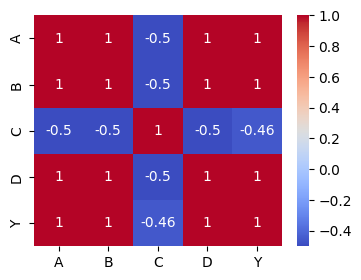

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
sns.heatmap(df_corr, cmap='coolwarm', annot=True)

In [50]:
# features with correlation higher than 0.8 and 
# lower than -0.8 are highly correlated
# features A and B are higly correlated with feature D, 
# so removing feature A and B
df.drop(['A', 'B'], axis=1, inplace=True)
df

,C,D,Y
0,5,4,10
1,3,8,12
2,1,12,15
3,4,16,18
4,2,20,20


True

In [ ]:
for 